In [37]:

#from sklearn.datasets import load_iris
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt
#import pandas as pd

In [38]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
df.shape

(150, 4)

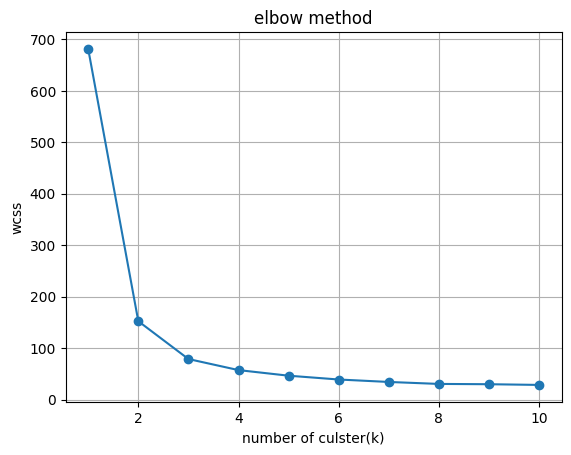

In [39]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,marker='o')
plt.title('elbow method')
plt.xlabel('number of culster(k)')
plt.ylabel('wcss')
plt.grid()
plt.show()

In [40]:
import numpy as np

In [41]:
point = np.array([[2,3], [5,7], [1,2], [4,4]])
centoid = np.array([[5,7], [1,2]])

In [42]:
dis = np.linalg.norm(point[:, None] - centoid, axis =2)
print(dis)

[[5.         1.41421356]
 [0.         6.40312424]
 [6.40312424 0.        ]
 [3.16227766 3.60555128]]


In [43]:
label = np.argmin(dis,axis =1)
print(label)

[1 0 1 0]


In [44]:
new_cen = np.array([point[label ==0].mean(axis=0),point[label==1].mean(axis=0)])

In [45]:
print(new_cen)

[[4.5 5.5]
 [1.5 2.5]]


In [50]:
if np.allclose(centoid, new_cen):
    break

SyntaxError: 'break' outside loop (521005382.py, line 2)

In [47]:
dis2= np.linalg.norm(centoid)


In [48]:
print(dis2)

8.888194417315589


In [49]:
a = dis - dis2
print(a)

[[-3.88819442 -7.47398085]
 [-8.88819442 -2.48507018]
 [-2.48507018 -8.88819442]
 [-5.72591676 -5.28264314]]


In [55]:
def kmeans(X, k, max_iters=100):
    cen = X [np.random.choice(len(X), k, replace=False)]
    for i in range(max_iters):
        dis = np.linalg.norm(X [:, None] - cen, axis=2)

        label = np.argmin(dis, axis=1)

        new_cen = []
        for j in range(k):
            if np.sum(label == j) ==0:
                new_cen.append(X[np.random.choice(len(X))])
            else:
                new_cen.append(X[label==j].mean(axis=0))

            new_cen = np.array(new_cen)
            if np.allclose(cen, new_cen):
                break
            cen = new_cen
    return label, cen
            
                               
        
    